## Crypto Arbitrage

This report focuses on arbitrage opportinities in Bitcoin and other cryptocurrencies. The report looks closely on price dislocations in markets where Bitcoin is trared.

I will sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. My task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

The 3 phases are:

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Importing the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collection of the Data

### Step 1: Importing the data from `bitstamp.csv` file, and creating a DataFrame called `bitstamp`. 

In [2]:
# Reading in the CSV file called "bitstamp.csv" using the Path module. 
bitstamp = pd.read_csv(Path("~/Desktop/FinTech-Workspace/Week_3/crypto_arbitrage/Starter_Code/Resources/bitstamp.csv"), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)


### Step 2: Using the `head` function to confirm that Pandas properly imported the data.

In [3]:
bitstamp.head()
# bitstamp.tail() would show last 5 rows of the DataFrame

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,"$13,646.48",3.334553,45482.128790,13639.64748
2018-01-01 00:01:00,13646.48,13658.75,13610.18,"$13,658.75",2.663188,36361.390890,13653.33282
2018-01-01 00:02:00,13616.93,13616.93,13610.06,"$13,610.22",0.084653,1152.144036,13610.13625
2018-01-01 00:03:00,13610.27,13639.09,13610.27,"$13,639.09",7.182986,97856.416480,13623.36113
2018-01-01 00:04:00,13635.35,13636.35,13620.00,"$13,620.00",1.069665,14582.660930,13632.92333


### Step 3: Repeating Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Reading in the CSV file called "coinbase.csv" using the Path module. 
coinbase = pd.read_csv(Path("~/Desktop/FinTech-Workspace/Week_3/crypto_arbitrage/Starter_Code/Resources/coinbase.csv"), index_col = "Timestamp", parse_dates = True, infer_datetime_format = True)


In [5]:
coinbase.head()
# coinbase.tail() would show last 5 rows of the DataFrame

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Preparing the Data

### Step 1: Droping all `NaN`, or missing, values in the DataFrame for the bitstamp DataFrame.

In [6]:
bitstamp.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,"$13,646.48",3.334553,45482.128790,13639.647480
2018-01-01 00:01:00,13646.48,13658.75,13610.18,"$13,658.75",2.663188,36361.390890,13653.332820
2018-01-01 00:02:00,13616.93,13616.93,13610.06,"$13,610.22",0.084653,1152.144036,13610.136250
2018-01-01 00:03:00,13610.27,13639.09,13610.27,"$13,639.09",7.182986,97856.416480,13623.361130
2018-01-01 00:04:00,13635.35,13636.35,13620.00,"$13,620.00",1.069665,14582.660930,13632.923330
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,"$6,922.56",1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,"$6,920.32",3.069539,21245.076280,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,"$6,934.72",28.239049,195789.408200,6933.286106


### Step 2: Using the `str.replace` function to remove the commas (,) and dollar signs ($) from the values in the Close column.

In [7]:
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$","")
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace(",","")
bitstamp.head()

C:\Users\Magda\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128790,13639.64748
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390890,13653.33282
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.13625
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416480,13623.36113
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660930,13632.92333


### Step 3: Converting the data type of the Close column to a `float`.

In [8]:
bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Reviewing the data for duplicated values, and droping them if necessary.

In [9]:
bitstamp.duplicated().sum()

472

In [10]:
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeating Steps 1–4 for the coinbase DataFrame.

In [11]:
coinbase.dropna()

coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$","")
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace(",","")
coinbase.head()

C:\Users\Magda\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [12]:
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [13]:
coinbase.duplicated().sum()

217

In [14]:
coinbase=coinbase.drop_duplicates()

In [15]:
coinbase.duplicated().sum()

0

## Analyzing the Data

### Step 1: Choosing columns of data on which I am going to focus my analysis.

I am going to use `loc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [16]:
bitstamp_sliced = bitstamp.loc[:,'Close':'Close']

bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [17]:
coinbase_sliced = coinbase.loc[:,'Close':'Close']

coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sorting through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities.


In [18]:
# Generating the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [19]:
# Generating the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

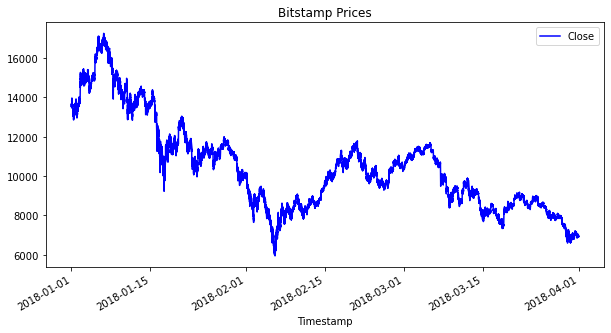

In [20]:
# Creating a line plot for the bitstamp DataFrame for the full length of time in the dataset 
bitstamp_sliced.plot(figsize=(10,5), title="Bitstamp Prices", color="blue")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

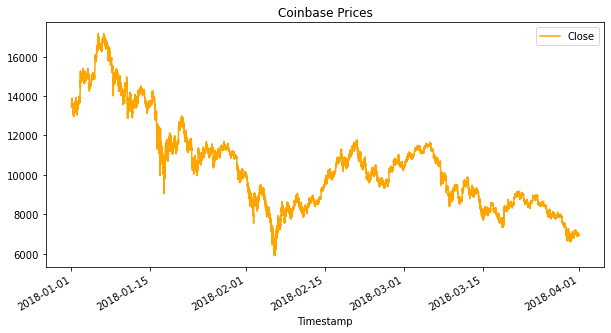

In [21]:
# Creating a line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(figsize=(10,5), title="Coinbase Prices", color="orange")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

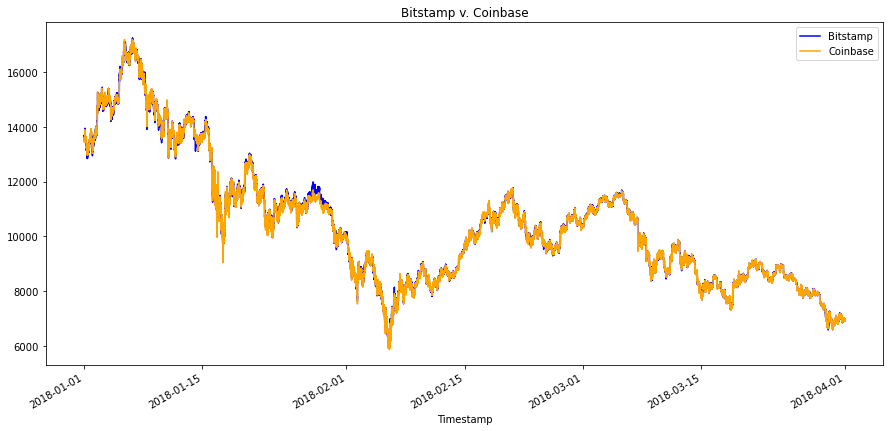

In [22]:
# Overlaying the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot visualizes the prices over the full lenth of the dataset
bitstamp_sliced['Close'].plot(legend=True, figsize=(15,7), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15,7), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Early Comparison - January 2018'}, xlabel='Timestamp'>

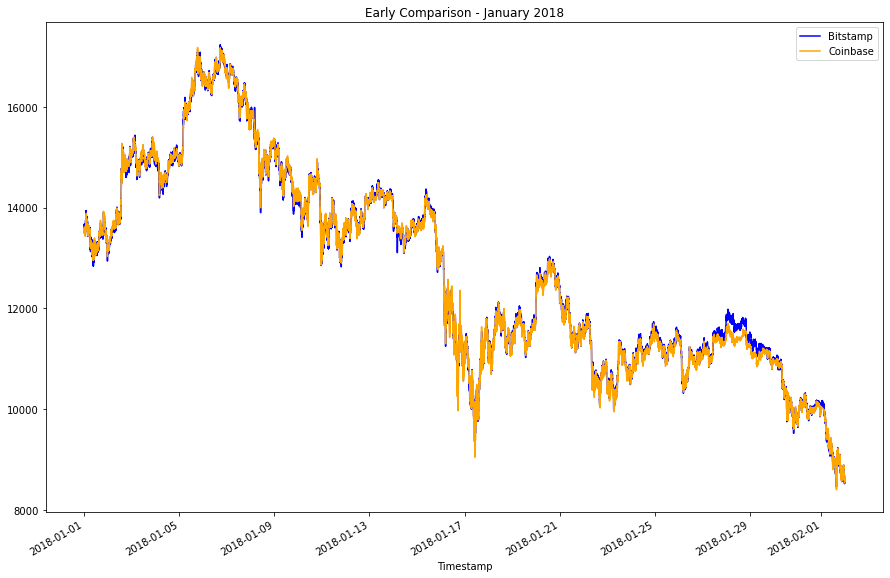

In [23]:
# Using the loc and plot functions, creating an overlay plot that visualizes 
# the price action of both DataFrames for January 2018
bitstamp_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15,10), title="Early Comparison - January 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-01':'2018-02-01'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

<AxesSubplot:title={'center':'Later Comparison - March 2018'}, xlabel='Timestamp'>

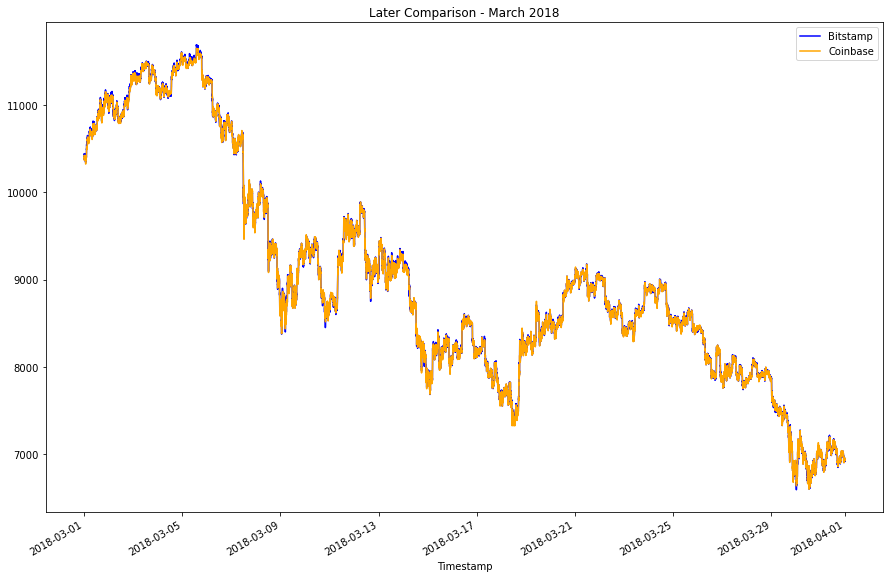

In [24]:
# Using the loc and plot functions, creating an overlay plot that visualizes 
# the price action of both DataFrames for March 2018
bitstamp_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15,10), title="Later Comparison - March 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-01':'2018-04-01'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** At the beginning of the year 2018 there was more oportunities for arbitrage. Especialy, in the last days of January, prices on Bitstamp were significantly higher, therefore, selling on Bitstamp and buying on Coinbase could have resulted in a significant profit.

### Step 3: Focus on Specific Dates

Focusing my analysis on specific dates by completing the following steps:

1. Selecting three dates to evaluate for arbitrage profitability. Choosing one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generating the summary statistics and then creating a box plot. 

<AxesSubplot:title={'center':'January 16, 2018'}, xlabel='Timestamp'>

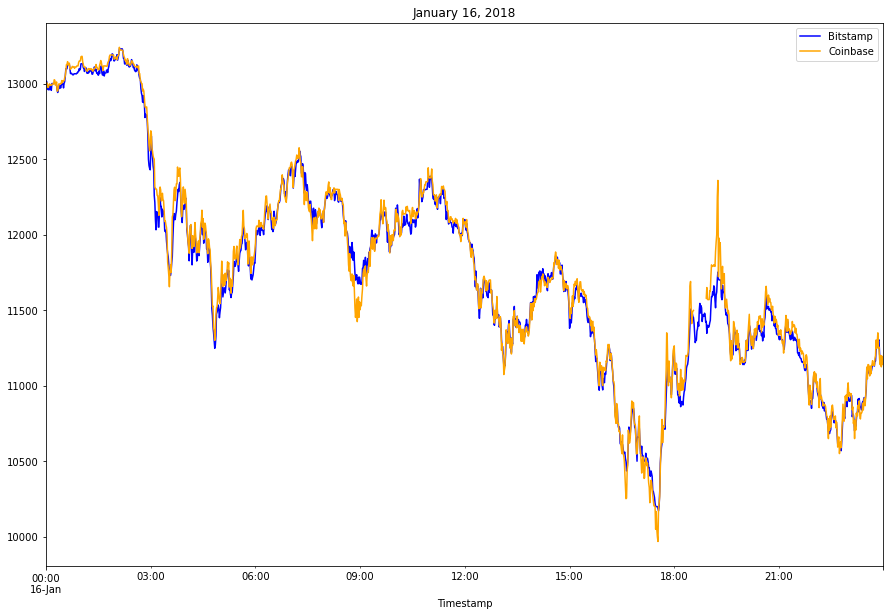

In [25]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day, January 16, 2018.

bitstamp_sliced['Close'].loc['2018-01-16'].plot(legend=True, figsize=(15,10), title="January 16, 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-01-16'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

In [26]:
# For Jan 16, 2018 calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16']

# Generating summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread - early date'}>

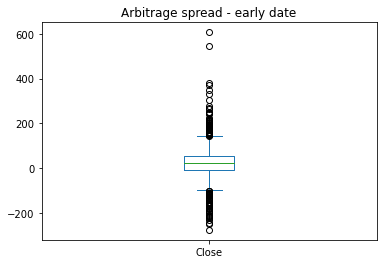

In [27]:
# Visualization of the arbitrage spread from Jan 16, 2018 in a box plot
arbitrage_spread_early.plot(kind="box", title = "Arbitrage spread - early date")

<AxesSubplot:title={'center':'February 22, 2018'}, xlabel='Timestamp'>

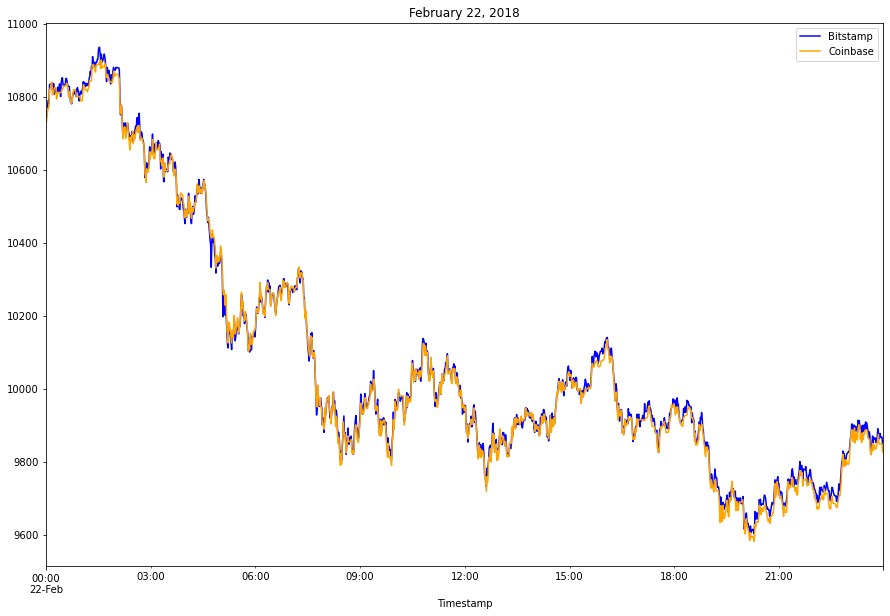

In [28]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day, February 22, 2018.  
bitstamp_sliced['Close'].loc['2018-02-22'].plot(legend=True, figsize=(15,10), title="February 22, 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-02-22'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

In [29]:
# For Feb 22, 2018 calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-22'] - bitstamp_sliced['Close'].loc['2018-02-22']

# Generating summary statistics 
arbitrage_spread_middle.describe()

count    1440.000000
mean       -7.987979
std        13.413677
min       -49.730000
25%       -17.105000
50%        -8.695000
75%         0.415000
max        82.830000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread - middle date'}>

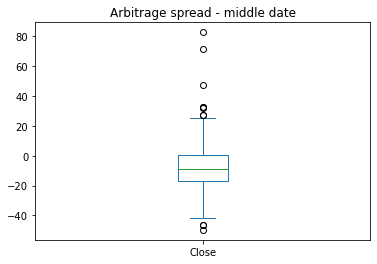

In [30]:
# Visualizarion of the arbitrage spread from Feb 22, 2018 in a box plot
arbitrage_spread_middle.plot(kind="box", title = "Arbitrage spread - middle date")

<AxesSubplot:title={'center':'March 26, 2018'}, xlabel='Timestamp'>

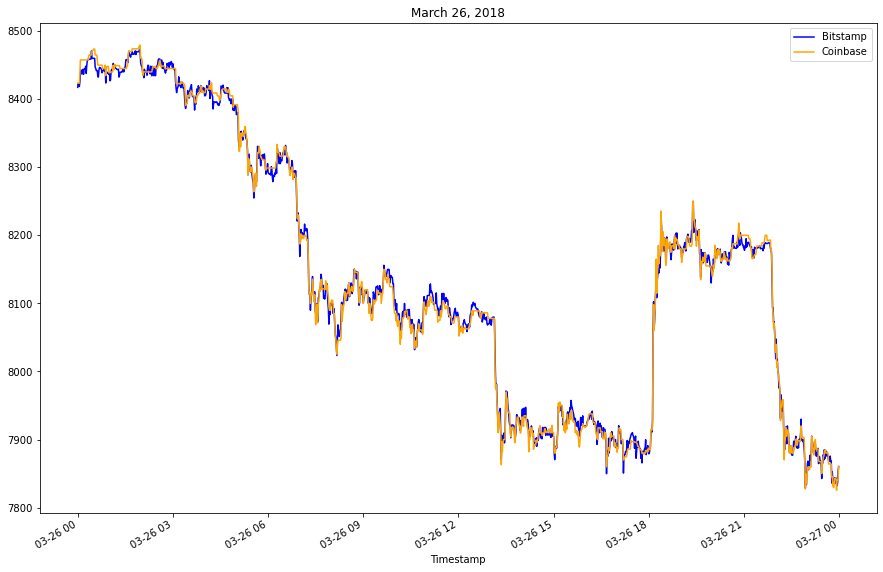

In [31]:
# Creating an overlay plot that visualizes the two dataframes over a period of one day, March 26, 2018. 
bitstamp_sliced['Close'].loc['2018-03-26'].plot(legend=True, figsize=(15,10), title="March 26, 2018", color="blue", label="Bitstamp")
coinbase_sliced['Close'].loc['2018-03-26'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase")

In [32]:
# For March 26, 2018 calculating the arbitrage spread by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-26'] - bitstamp_sliced['Close'].loc['2018-03-26']

# Generating summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage spread - late date'}>

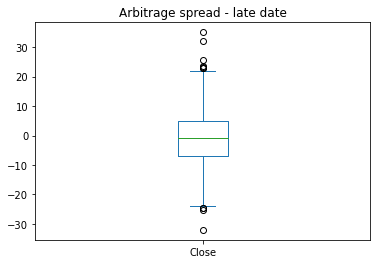

In [33]:
# Visualization of the arbitrage spread from March 26, 2018 in a box plot
arbitrage_spread_late.plot(kind="box", title = "Arbitrage spread - late date")

### Step 4: Calculating the Arbitrage Profits

My goal is to determine whether arbitrage opportunities still exist in the Bitcoin market.  1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.


#### 1. For each of the three dates, measuring the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then using a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.


In [34]:
# measuring the arbitrage spread between the two exchanges
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16']

# conditional statement to generate the summary statistics
arbitrage_spread_early_stat = arbitrage_spread_early[arbitrage_spread_early>0]
arbitrage_spread_early_stat.describe()

count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64

In [35]:
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-22'] - bitstamp_sliced['Close'].loc['2018-02-22']

arbitrage_spread_middle_stat = arbitrage_spread_middle[arbitrage_spread_middle>0]
arbitrage_spread_middle_stat.describe()

count    384.000000
mean       8.462578
std        8.587745
min        0.010000
25%        2.715000
50%        6.465000
75%       12.067500
max       82.830000
Name: Close, dtype: float64

In [36]:
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-26'] - bitstamp_sliced['Close'].loc['2018-03-26']

arbitrage_spread_late_stat = arbitrage_spread_late[arbitrage_spread_late>0]
arbitrage_spread_late_stat.describe()

count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculating the spread returns. 

In [37]:
# Calculating the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange we are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early_stat/bitstamp_sliced['Close'].loc['2018-01-16']

# Reviewing the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

In [38]:
spread_return_middle= arbitrage_spread_middle_stat/bitstamp_sliced['Close'].loc['2018-02-22']
spread_return_middle.head()

Timestamp
2018-02-22 00:00:00   NaN
2018-02-22 00:01:00   NaN
2018-02-22 00:02:00   NaN
2018-02-22 00:03:00   NaN
2018-02-22 00:04:00   NaN
Name: Close, dtype: float64

In [39]:
spread_return_late= arbitrage_spread_late_stat/bitstamp_sliced['Close'].loc['2018-03-26']
spread_return_late.head()

Timestamp
2018-03-26 00:00:00    0.000738
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001395
Name: Close, dtype: float64

#### 3. For each of the three dates, narrowing down your trading opportunities even further. 

In [40]:
# For each date, determining the number of times our trades with positive returns 
# exceed the 1% minimum threshold (.01) that we need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>.01]

# Reviewing the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
Name: Close, dtype: float64

In [41]:
profitable_trades_middle = spread_return_middle[spread_return_middle>.01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [42]:
profitable_trades_late = spread_return_late[spread_return_late>.01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

**NOTE:** For dates 2018-02-22 and 2018-03-26 there were no returns that exceed the transaction cost treashold of 1%. Therefore, we will not continue in calculating profit for these dates.

#### 4. Generating the summary statistics of the spread returns that are greater than 1%. 

In [43]:
profitable_trades_early.describe()

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

#### 5. Calculating the potential profit, in dollars, per trade. 

In [44]:

# Multiplying the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2018-01-16']

# Droping any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# Viewing the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
Name: Close, dtype: float64

#### 6. Generating the summary statistics, and ploting the results.

In [45]:
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits - January 16'}, xlabel='Timestamp'>

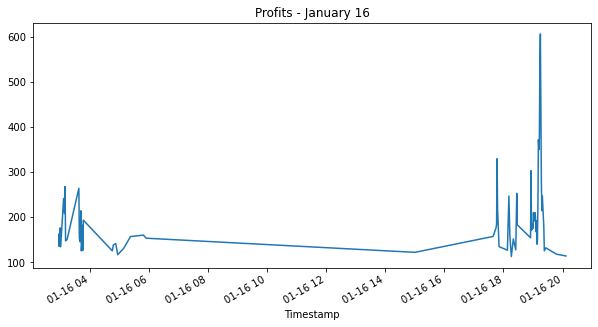

In [46]:
profit_per_trade_early.plot(figsize=(10,5), title="Profits - January 16")

#### 7. Calculating the potential arbitrage profit.

In [47]:
profit_early_sum=profit_per_trade_early.sum()
profit_early_sum

14147.169999999998

#### 8. Using the `cumsum` function, ploting the cumulative sum.

In [48]:
# Using the cumsum function to calculate the cumulative profits
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits'}, xlabel='Timestamp'>

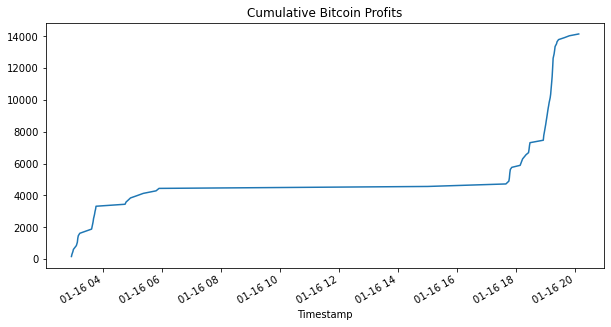

In [49]:
# Ploting the cumulative sum of profits
cumulative_profit_early.plot(figsize=(10,5), title="Cumulative Bitcoin Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Prices went up early in the morning on January 16 and stayed at certain level for most of the day and towards the end of the day the prices escalated and closed very high. 
For February 22 and March 26 there were no returns that exceed the transaction cost treashold of 1%.